In [1]:
#Importing Library Files 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
#combining the datasets since it is splitted

rawdf1=pd.read_csv('customer_churn_dataset-testing-master.csv')
print(rawdf1.shape)
rawdf2=pd.read_csv('customer_churn_dataset-training-master.csv')
print(rawdf2.shape)
rawdf=pd.concat([rawdf1,rawdf2],axis=0)
rawdf.head()


(64374, 12)
(440833, 12)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [3]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [4]:
rawdf.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [5]:
#Churn is target 
#dropping unnecessary columns 
df=rawdf.drop(columns=['CustomerID'],axis=1)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [6]:
#checking missing values 

df.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [7]:
df[df['Age'].isna()]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df=df.dropna()

In [10]:
#check duplicates 
df.duplicated().sum()

np.int64(0)

In [12]:
num_col= df.select_dtypes(include='number').columns

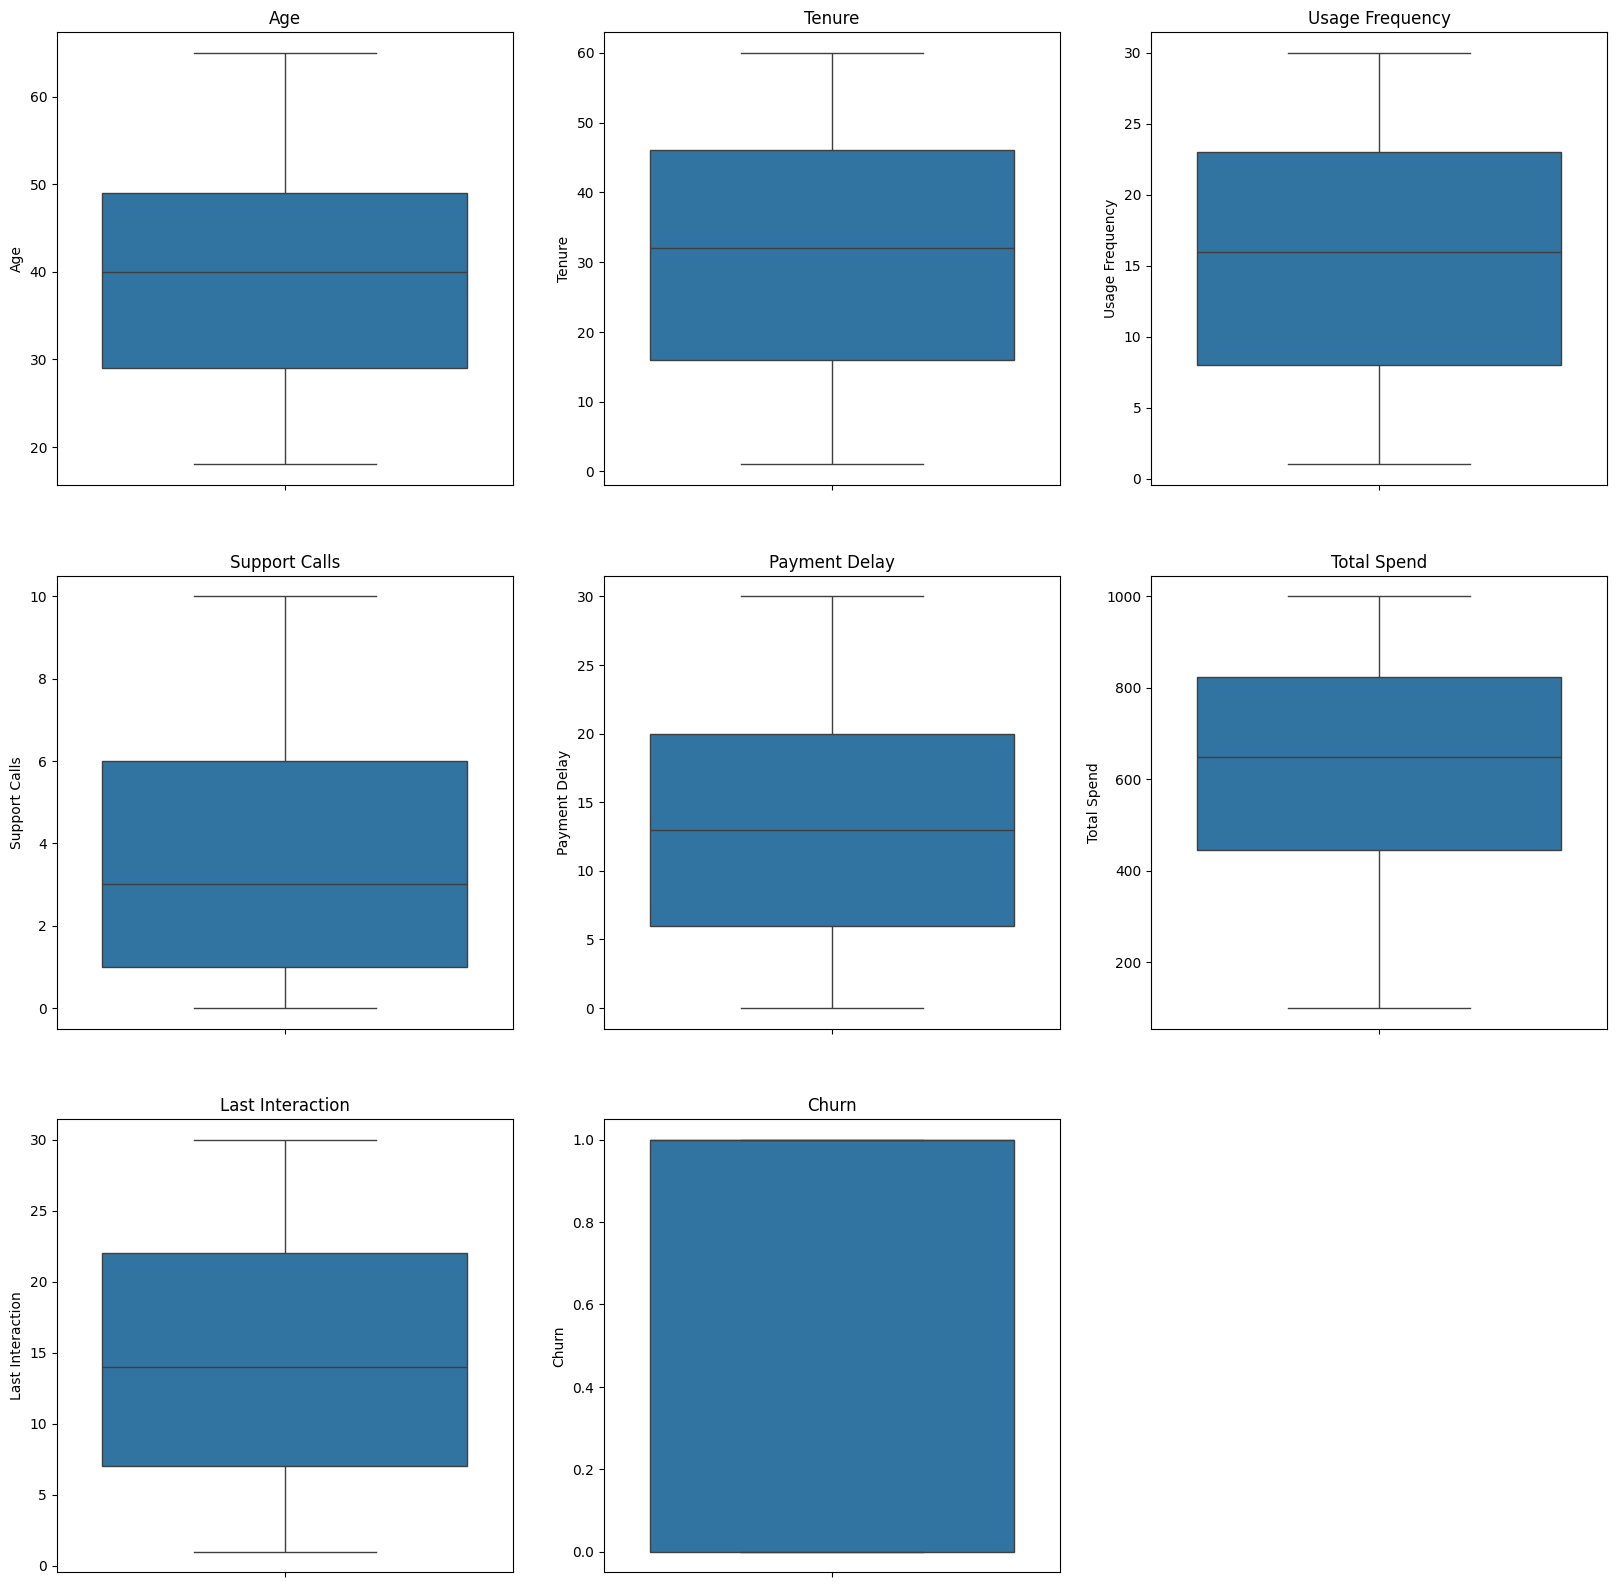

In [13]:
#check outliers
columns = num_col
plt.figure(figsize=(20,20))

for i, col in enumerate(columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(df[col])
    plt.title(col)
    
plt.show()

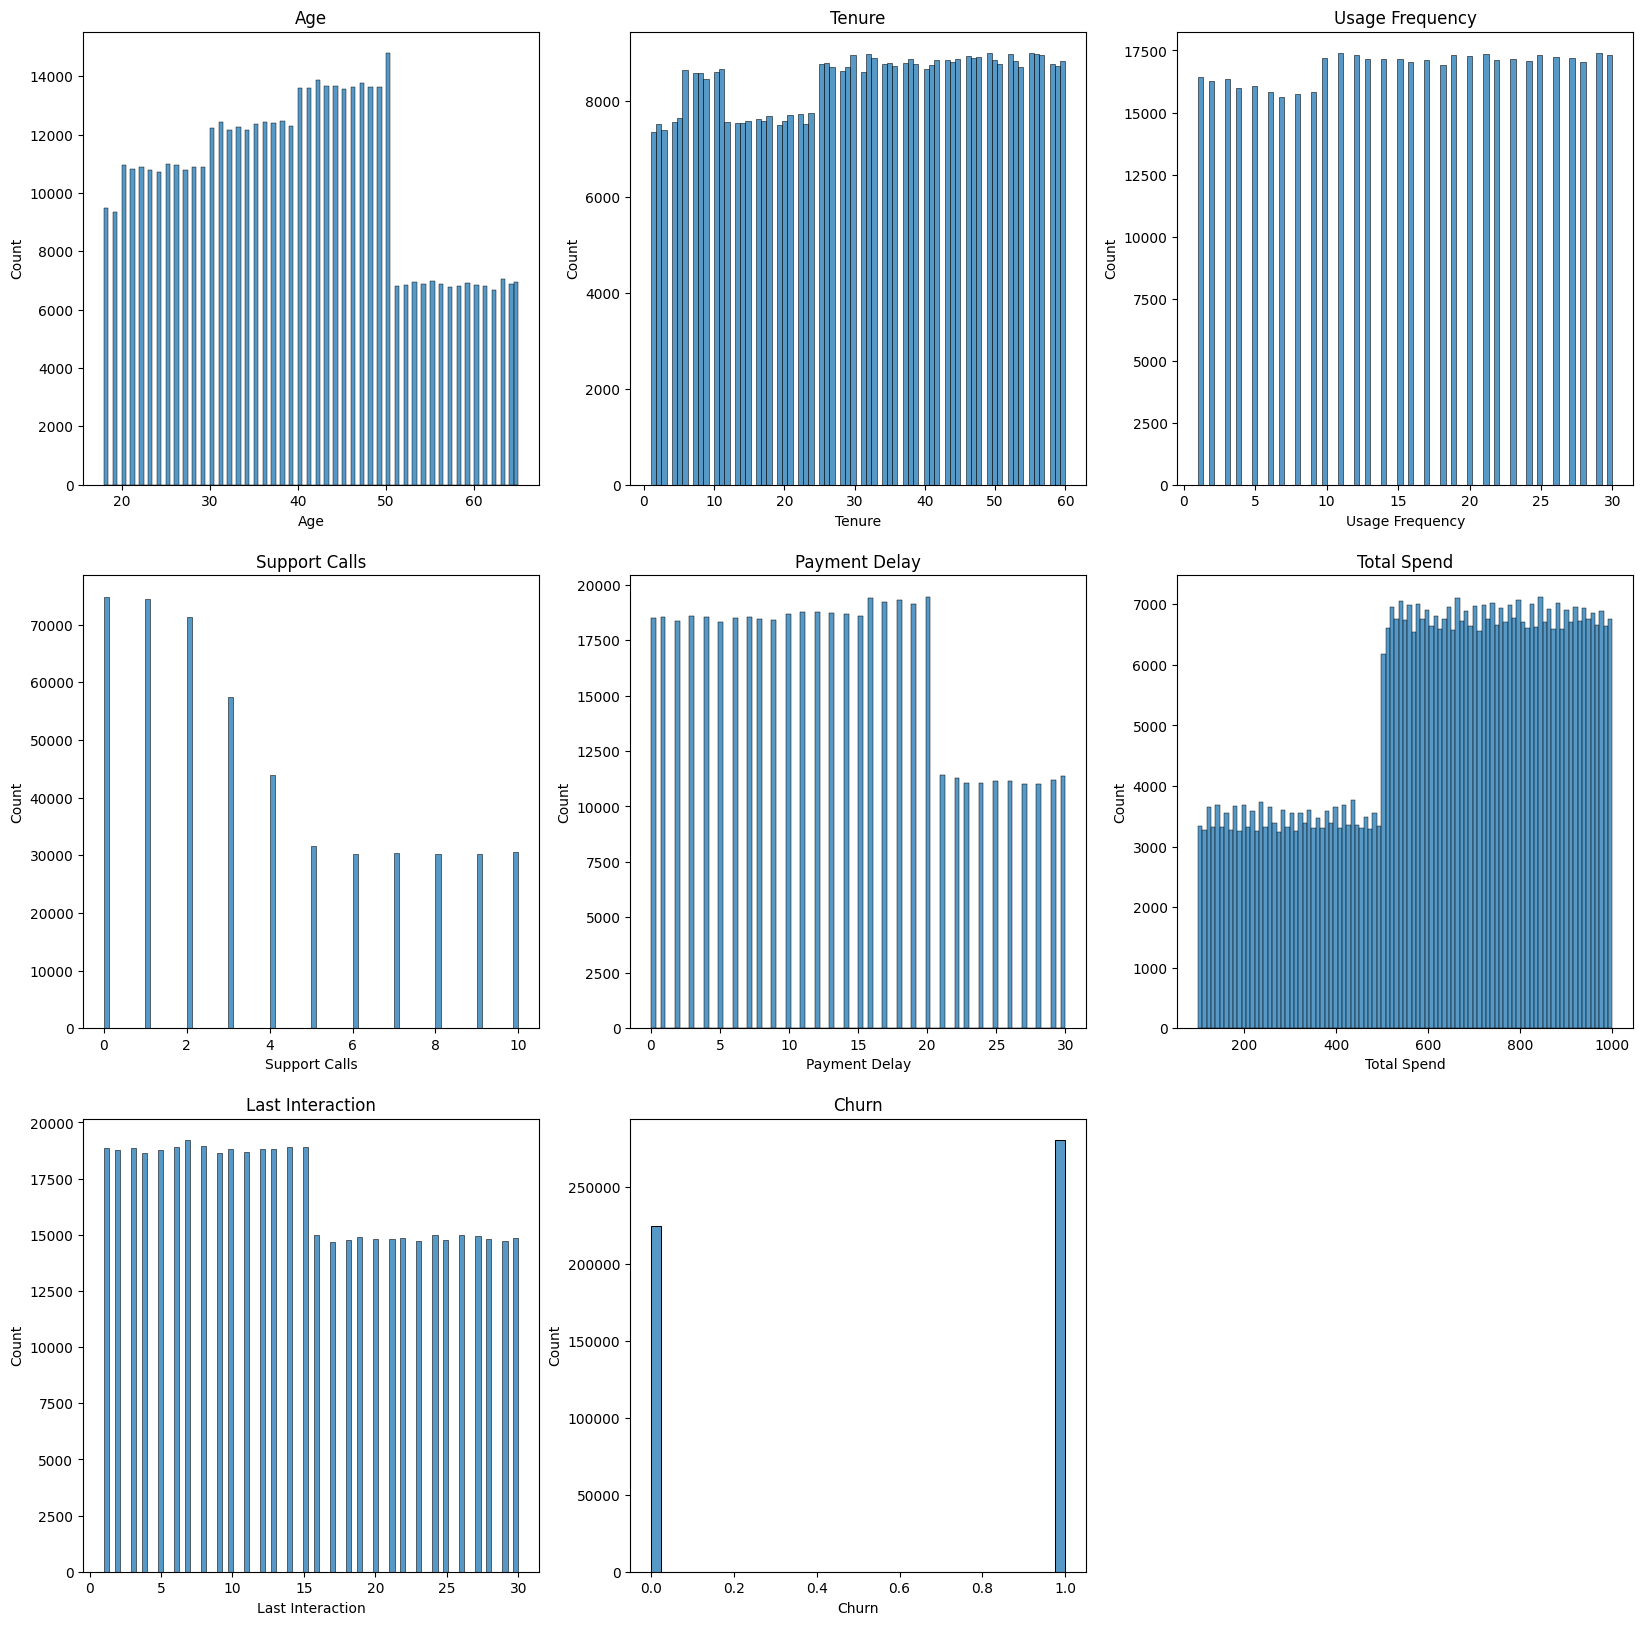

In [ ]:
#no outliers
#check distributions 
plt.figure(figsize=(20,20))

for i, col in enumerate(columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col])
    plt.title(col)
    
plt.show()

In [ ]:
#churn is imbalanced

In [17]:
df.shape

(505206, 11)

In [20]:
#splitting X and y 
y = df['Churn']
X = df.drop(columns='Churn')
X.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0
1,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0
2,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0
3,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0
4,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0


In [22]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')

In [23]:
#Encoding categorical values 
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']

OHE = OneHotEncoder(sparse_output=False)
OHE.fit(X[cat_cols])

feature_names = OHE.get_feature_names_out(cat_cols)

OHE_df = pd.DataFrame(OHE.transform(X[cat_cols]), columns=feature_names,index=X.index)

# Drop original categorical cols
X = X.drop(columns=cat_cols)

# Combine encoded 
X= pd.concat([X,OHE_df], axis=1)

X.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,22.0,25.0,14.0,4.0,27.0,598.0,9.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,41.0,28.0,28.0,7.0,13.0,584.0,20.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,47.0,27.0,10.0,2.0,29.0,757.0,21.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,35.0,9.0,12.0,5.0,17.0,232.0,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,53.0,58.0,24.0,9.0,2.0,533.0,18.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [26]:
num_col

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_cols = ['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction']
X[scale_cols] = scaler.fit_transform(X[scale_cols])
X.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,-1.397268,-0.368409,-0.198951,0.053192,1.597784,-0.089976,-0.651766,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.102271,-0.194369,1.425308,1.010558,-0.058790,-0.147044,0.626074,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.575809,-0.252383,-0.663026,-0.585052,1.834437,0.558160,0.742241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.371268,-1.296620,-0.430988,0.372314,0.414517,-1.581911,0.393740,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.049348,1.546026,0.961234,1.648801,-1.360383,-0.354937,0.393740,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [28]:
X.shape,y.shape

((505206, 15), (505206,))

In [29]:
#split train & test 

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=11)
print(X_train.shape,X_test.shape)

(404164, 15) (101042, 15)


In [32]:
#Logistic Regression model 

lr= LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
predicted_y_test = lr.predict(X_test)

print("Accuracy:",accuracy_score(y_test, predicted_y_test))
print("Precision:",precision_score(y_test, predicted_y_test))
print("Recall:",recall_score(y_test, predicted_y_test))
print("F1:",f1_score(y_test, predicted_y_test))

Accuracy: 0.8442429880643693
Precision: 0.8865238637900064
Recall: 0.8231201018633095
F1: 0.8536462886156937


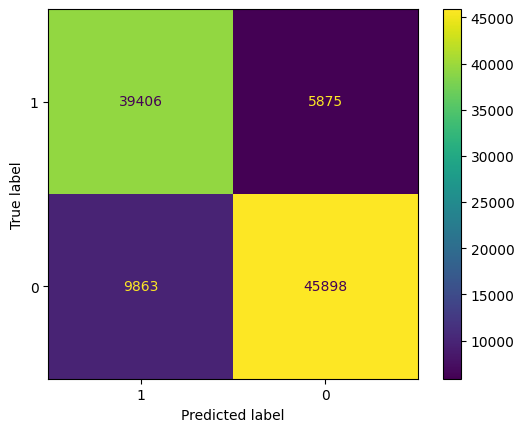

In [37]:
cm=confusion_matrix(y_test, predicted_y_test)
from sklearn.metrics import ConfusionMatrixDisplay
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
display.plot()
plt.show()

In [39]:
#KNN model 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
kpredict_y_test = knn.predict(X_test)

print("Accuracy:",accuracy_score(y_test, kpredict_y_test))
print("Precision:",precision_score(y_test, kpredict_y_test))
print("Recall:",recall_score(y_test, kpredict_y_test))
print("F1:",f1_score(y_test, kpredict_y_test))

Accuracy: 0.9007046574691713
Precision: 0.8994409503843466
Recall: 0.9232976453076523
F1: 0.9112131751046451


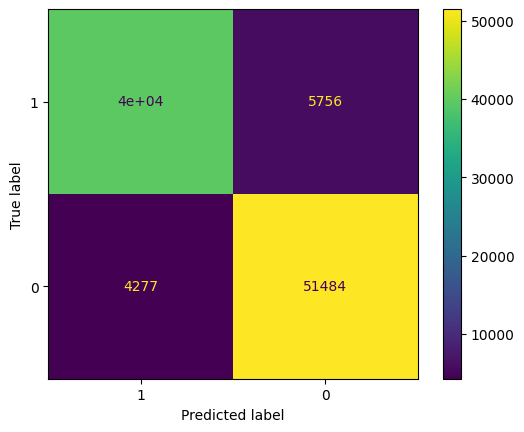

In [40]:
cm2=confusion_matrix(y_test, kpredict_y_test)
from sklearn.metrics import ConfusionMatrixDisplay
display=ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[1,0])
display.plot()
plt.show()